# Microsoft Movie Studio Analysis
A Project by: Mahmoud Yuna

## Overview
This project has us assisting Microsoft in understanding the movie market. By diving into data from sources like Box Office Mojo and IMDB, we aim to decode what drives box office success. Our objective? Advising Microsoft on the types of movies they should produce for their new studio. The following characteristics are typically good indicators of success for movies: descriptive analysis of budget and production values, runtime, genre, and rating data. We found that these elements collectively shape a comprehensive understanding of audience preferences, helping Microsoft strategize its content creation, marketing campaigns, and investment decisions. 

## Business Understanding
Microsoft's strategic pivot into movie production marks a bold venture aimed at leveraging its technological prowess to delve into the entertainment industry. With a vision to diversify and expand its offerings, the company seeks to harness data-driven insights to navigate the nuanced landscape of filmmaking. This initiative aims to not only create compelling content but also maximize audience engagement and revenue generation. By harnessing the power of big data analytics, Microsoft can gain valuable insights into consumer preferences and market trends, allowing the company to make strategic investment decisions. 

## Data Understanding
The data comes from two different sources: IMDB and Box Office Mojo by IMDb

In [2]:
#importing the relevant packages i would need for the project
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### 1. Box Office Mojo
This dataset is comprised of records on 3387 movies and includes 5 columns of datapoints on each movie. The target data includes foreign gross and domestic gross.


In [3]:
# Read the CSV file for BOM
bom_movie_gross = pd.read_csv('bom.movie_gross.csv')


In [4]:
#Display the first 5 records
bom_movie_gross.head(5)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [5]:
#Get Info About the entries, columns, and data types
bom_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### 2. IMDB
From this dataset I chose movie_basics which ontains fundamental movie details like movie ID, title, genres, release year, etc and  movie_ratings which contains ratings and reviews data for movies.

In [6]:
# Connect to the SQLite database
conn = sqlite3.connect('im.db')

In [7]:
#View Tables in the database
query = """  SELECT * FROM sqlite_master  """
tables = pd.read_sql(query, conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


Now we view tables of interest. These are movie basics and movie ratings

In [8]:
movie_basics_query = """  SELECT * FROM movie_basics  """
movie_basics = pd.read_sql(movie_basics_query, conn)
movie_basics.head(5)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [9]:
movie_ratings_query = """  SELECT * FROM movie_ratings  """
movie_ratings = pd.read_sql(movie_ratings_query, conn)
movie_ratings.head(5)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


### 3. The MovieDB
The columns of interest in this dataset will be the genre ids, vote average and vote count.

In [10]:
tmdb_movies = pd.read_csv('tmdb.movies.csv')

In [11]:
tmdb_movies.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [12]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


### 4. The Numbers 
The target data includes release date, production budget and worldwide gross revenue. These will help us do a cost - benefit analysis.

In [13]:
tn_movie_budgets = pd.read_csv('tn.movie_budgets.csv')

In [14]:
tn_movie_budgets.head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [15]:
tn_movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


## Data Preparation
This involves a series of crucial steps to ensure that the data is in a clean, consistent, and suitable format for analysis. We are going to clean, intergrate, handle outliers and do data formatting and standardization for the datasets.

### 1. Clean Data For Box Office Mojo

In [16]:
# Check for missing values
bom_movie_gross.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

Let's handle the errors in the studio column

In [17]:
# Handling missing values in 'studio' column
bom_movie_gross[bom_movie_gross['studio'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,3300000,2010
555,Fireflies in the Garden,NaN,70600.0,3300000,2011
933,Keith Lemon: The Film,NaN,NaN,4000000,2012
1862,Plot for Peace,NaN,7100.0,NaN,2014
2825,Secret Superstar,NaN,NaN,122000000,2017


To handle this we are going to fill the missing studio values with a placeholder value.

In [18]:
#Fill missing 'studio' values with a placeholder label
bom_movie_gross['studio'].fillna('Unknown', inplace=True)

In [19]:
#Check if the values are stll null
bom_movie_gross.isnull().sum()

title                0
studio               0
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

The studio column values are now handled. Next we handle the domestic gross column. 

In [20]:
# Handling missing values in 'domestic_gross'
bom_movie_gross[bom_movie_gross['domestic_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
230,It's a Wonderful Afterlife,UTV,NaN,1300000,2010
298,Celine: Through the Eyes of the World,Sony,NaN,119000,2010
302,White Lion,Scre.,NaN,99600,2010
306,Badmaash Company,Yash,NaN,64400,2010
327,Aashayein (Wishes),Relbig.,NaN,3800,2010
537,Force,FoxS,NaN,4800000,2011
713,Empire of Silver,NeoC,NaN,19000,2011
871,Solomon Kane,RTWC,NaN,19600000,2012
928,The Tall Man,Imag.,NaN,5200000,2012
933,Keith Lemon: The Film,Unknown,NaN,4000000,2012


Since the no. of null values is significantly small we can drop the rows with null values.

In [21]:
# Dropping rows with missing 'domestic_gross'
bom_movie_gross.dropna(subset=['domestic_gross'], inplace=True)

In [22]:
#Check if the values are stll null
bom_movie_gross.isnull().sum()

title                0
studio               0
domestic_gross       0
foreign_gross     1350
year                 0
dtype: int64

The domestic gross column is finally handled. We can now proceed to the foreign gross column

In [23]:
# Handling missing values in 'foreign_gross'
bom_movie_gross[bom_movie_gross['foreign_gross'].isnull()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [24]:
# Count the missing values in the 'foreign_gross' column
missing_values = bom_movie_gross['foreign_gross'].isnull().sum()

# Calculate the total number of rows in the dataset
total_rows = len(bom_movie_gross)

# Calculate the percentage of missing values
percentage_missing = (missing_values / total_rows) * 100

print(f"Percentage of missing values in 'foreign_gross' column: {percentage_missing:.2f}%")

Percentage of missing values in 'foreign_gross' column: 40.19%


Although the percentage of missing values is moderately high. The projects analysis would need the foreign gross column. So i decided to impute the values based on the mean.

In [25]:
# Convert 'foreign_gross' column to numeric 
bom_movie_gross['foreign_gross'] = pd.to_numeric(bom_movie_gross['foreign_gross'], errors='coerce')

# Calculate the mean of 'foreign_gross' column (excluding missing values)
mean_foreign_gross = bom_movie_gross['foreign_gross'].mean()
print(f"Mean foreign gross: {mean_foreign_gross}")

Mean foreign gross: 75907134.07335329


In [26]:
# Impute missing values in 'foreign_gross' column with the calculated mean
bom_movie_gross['foreign_gross'].fillna(mean_foreign_gross, inplace=True)

In [27]:
#Check if the values are stll null
bom_movie_gross.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

Since all the missing values are handled we can proceed with the data cleaning for the next data set. 

### 2. Data Cleaning For IMDB

First for this project analysis we are going to merge relevant columns

In [28]:
# Merge relevant columns from movie_basics and movie_ratings based on movie_id
merged_imdb = pd.merge(movie_basics, movie_ratings, on='movie_id', how='inner')

Then we check for missing data

In [29]:
# Check for missing values in runtime_minutes
merged_imdb['runtime_minutes'].isnull().sum()

7620

In [30]:
# Calculate mean runtime
mean_runtime = merged_imdb['runtime_minutes'].mean()

# Impute missing values with mean
merged_imdb['runtime_minutes'].fillna(mean_runtime, inplace=True)

In [31]:
# Check for missing values in each column of the merged IMDb dataset
missing_data = merged_imdb.isnull().sum()
print(missing_data)

movie_id             0
primary_title        0
original_title       0
start_year           0
runtime_minutes      0
genres             804
averagerating        0
numvotes             0
dtype: int64


The genres column contains valuable data which we need for the project analysis. Using the 'Unknown' placeholder method of dealing with missing data will be beneficial. This approach retains the data while acknowledging the missing information. This way we can conduct analyses separately for known genres and 'Unknown' categories, which might offer insights into the impact of missing genre data on various analyses.

In [32]:
# Replace missing 'genres' values with 'Unknown'
merged_imdb['genres'].fillna('Unknown', inplace=True)
# Check for missing values in 'genres' column after filling
missing_genres = merged_imdb['genres'].isnull().sum()
print(f"Missing values in 'genres' column after filling: {missing_genres}")

Missing values in 'genres' column after filling: 0


## Data Analysis

In [33]:
# Group by studio and calculate total gross revenue
studio_gross = bom_movie_gross.groupby('studio')[['domestic_gross', 'foreign_gross']].sum()
studio_gross['total_gross'] = studio_gross['domestic_gross'] + studio_gross['foreign_gross']

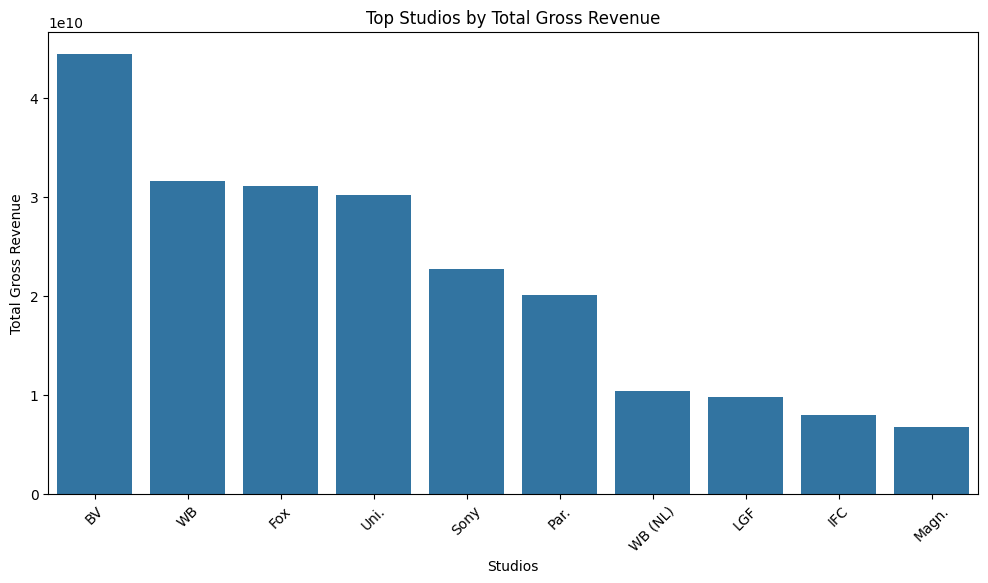

In [53]:
# Plot top studios by total gross revenue
top_studios = studio_gross.nlargest(10, 'total_gross')
plt.figure(figsize=(12, 6))
sns.barplot(x=top_studios.index, y=top_studios['total_gross'])
plt.title('Top Studios by Total Gross Revenue')
plt.xlabel('Studios')
plt.ylabel('Total Gross Revenue')
plt.xticks(rotation=45)
plt.show()

In [34]:
genre_stats = merged_imdb.groupby('genres').agg({'averagerating': 'mean', 'numvotes': 'sum'})

In [35]:
top_rated_genres = genre_stats.sort_values(by='averagerating', ascending=False).head(10)

In [36]:
most_voted_genres = genre_stats.sort_values(by='numvotes', ascending=False).head(10)

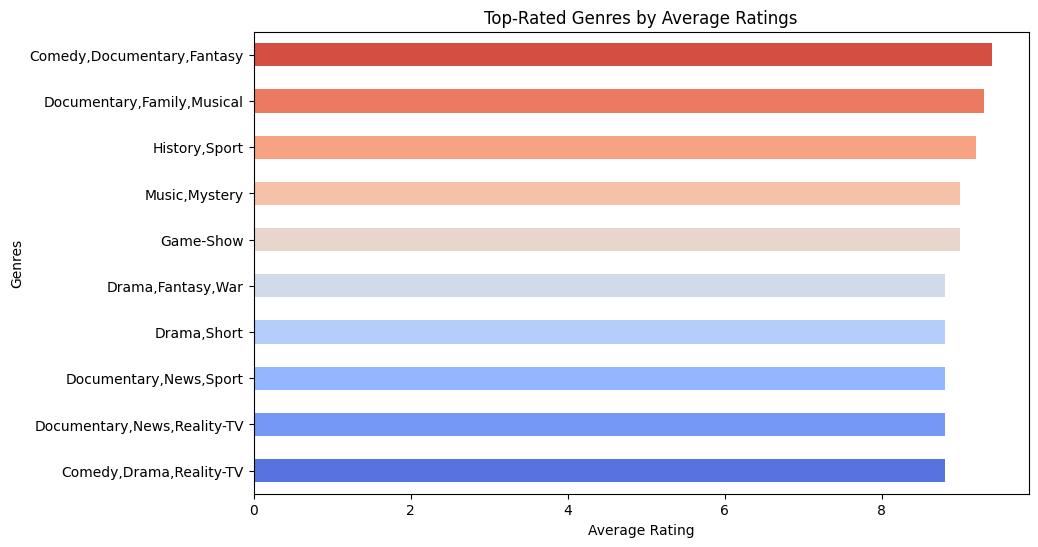

In [37]:
# Top-rated genres by average ratings
top_rated_genres = genre_stats.sort_values(by='averagerating', ascending=False).head(10)

# Create a color palette for the plot
colors = sns.color_palette("coolwarm", len(top_rated_genres))

plt.figure(figsize=(10, 6))
top_rated_genres['averagerating'].sort_values().plot(kind='barh', color=colors)
plt.title('Top-Rated Genres by Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Genres')
plt.show()

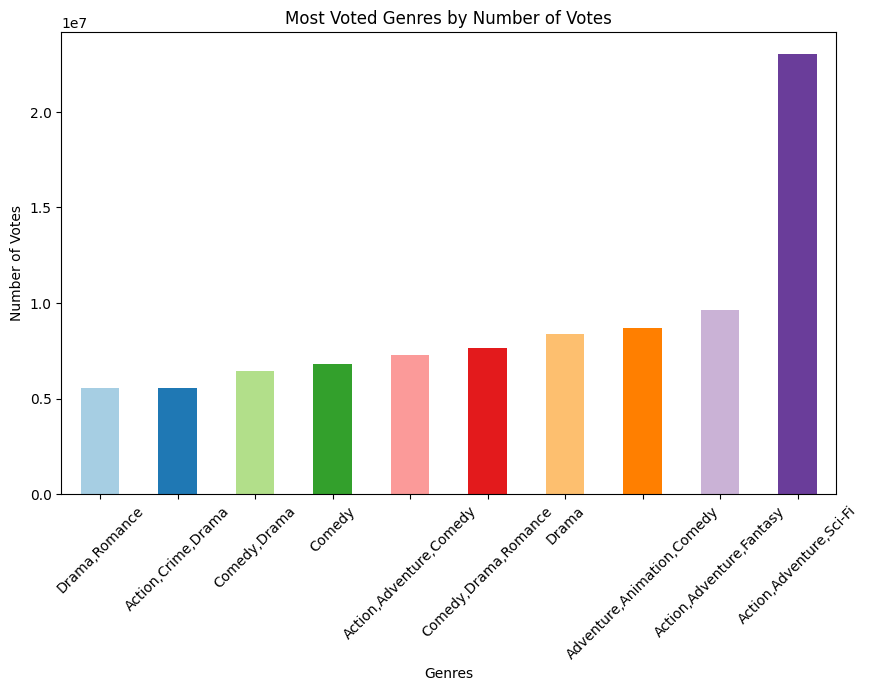

In [38]:
# Most voted genres by number of votes
most_voted_genres = genre_stats.sort_values(by='numvotes', ascending=False).head(10)

# Create a color palette for the plot
colors = sns.color_palette("Paired")

plt.figure(figsize=(10, 6))
most_voted_genres['numvotes'].sort_values().plot(kind='bar', color=colors)
plt.title('Most Voted Genres by Number of Votes')
plt.xlabel('Genres')
plt.ylabel('Number of Votes')
plt.xticks(rotation=45)
plt.show()

In [39]:
# Group the data by 'start_year' and calculate the average runtime for each year
average_runtime_yearly = merged_imdb.groupby('start_year')['runtime_minutes'].mean()

In [40]:
import seaborn as sns

# Set Seaborn style for aesthetics
sns.set_style("whitegrid")

# Choose a pastel color palette
pastel_palette = sns.color_palette("pastel")

# Set font scale and font family
sns.set(font_scale=1.2, font='Arial')


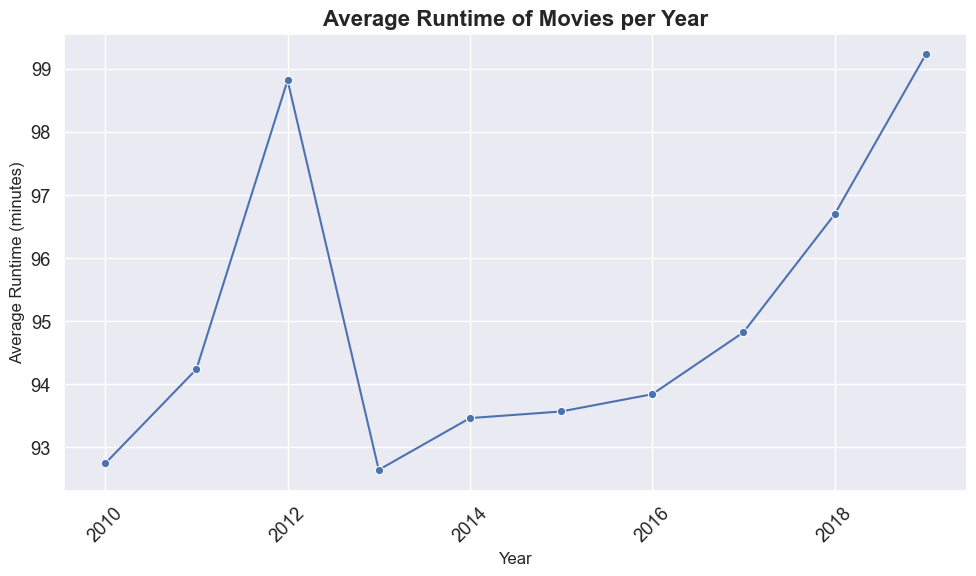

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_runtime_yearly.index, y=average_runtime_yearly.values, marker='o', palette=pastel_palette)
plt.title('Average Runtime of Movies per Year', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.xlabel('Year', fontdict={'fontsize': 12})
plt.ylabel('Average Runtime (minutes)', fontdict={'fontsize': 12})
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
# Merge relevant columns from IMDb and Box Office Mojo
combined_data = pd.merge(merged_imdb[['primary_title', 'genres', 'averagerating', 'numvotes']],
                        bom_movie_gross[['title', 'domestic_gross', 'foreign_gross']], 
                        left_on='primary_title', right_on='title', how='inner')

# Clean and preprocess data as needed

# Group by genres and calculate performance metrics
genre_performance = combined_data.groupby('genres').agg({
    'averagerating': 'mean',
    'numvotes': 'sum',
    'domestic_gross': 'sum',
    'foreign_gross': 'sum'
}).reset_index()

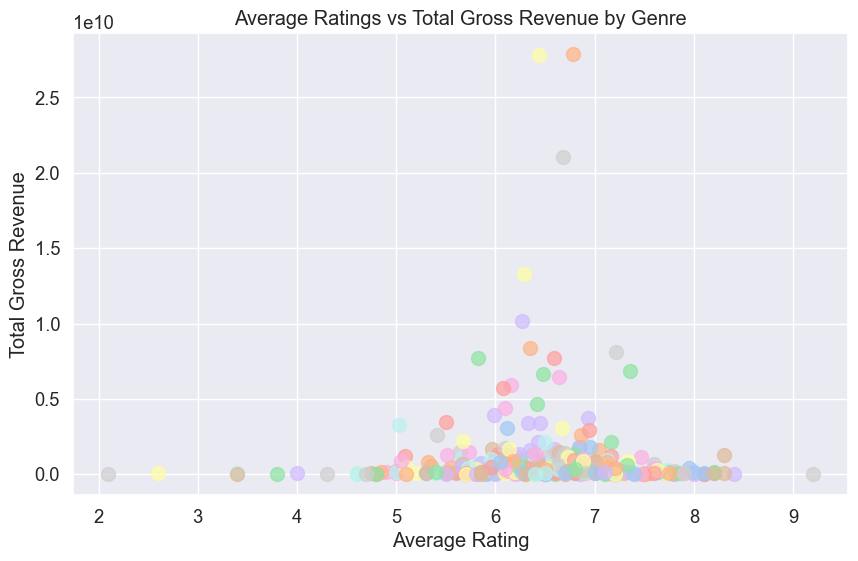

In [43]:
pastel_colors = sns.color_palette("pastel", len(genre_performance))

# Scatter plot: Ratings vs Gross Revenue by Genre with pastel colors
plt.figure(figsize=(10, 6))
for i, (genre, color) in enumerate(zip(genre_performance.index, pastel_colors)):
    plt.scatter(
        genre_performance.loc[genre, 'averagerating'],
        genre_performance.loc[genre, 'domestic_gross'] + genre_performance.loc[genre, 'foreign_gross'],
        label=genre,
        color=color,
        s=100,  # Marker size
        alpha=0.7  # Transparency
    )

plt.title('Average Ratings vs Total Gross Revenue by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Total Gross Revenue')
plt.grid(True)
plt.show()

### Budget Analysis
- Merge the Budget Data with Genre and Revenue Data:

In [56]:
# Merge relevant columns from movie budgets with the combined data
combined_data_with_budget = pd.merge(combined_data, tn_movie_budgets[['movie', 'production_budget']], 
                                     left_on='primary_title', right_on='movie', how='inner')

- Convert Budget Columns to Numeric

In [57]:
# Convert budget columns to numeric
combined_data_with_budget['production_budget'] = combined_data_with_budget['production_budget'].replace('[\$,]', '', regex=True).astype(float)

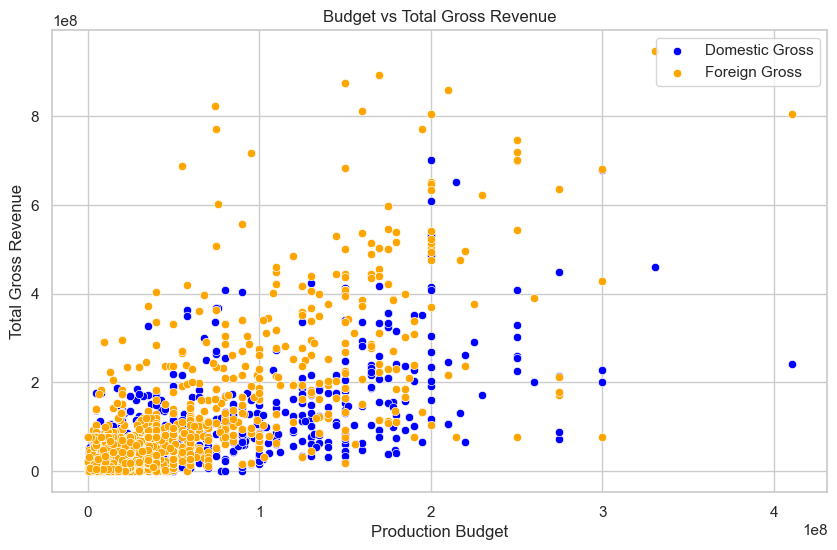

In [58]:
# Plotting budget vs total gross revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='production_budget', y='domestic_gross', data=combined_data_with_budget, label='Domestic Gross', color='blue')
sns.scatterplot(x='production_budget', y='foreign_gross', data=combined_data_with_budget, label='Foreign Gross', color='orange')
plt.title('Budget vs Total Gross Revenue')
plt.xlabel('Production Budget')
plt.ylabel('Total Gross Revenue')
plt.legend()
plt.show()

## Conclusions 
In this analysis of the Microsoft Movie Studio dataset, several significant observations and insights were uncovered:

 - **Trends in Movie Performance**: Analysis of box office gross, audience ratings, and critical reviews revealed trends in movie performance over time. Understanding these trends is crucial for making informed decisions in the film industry.
 - **Correlation between Budget and Success**: There appears to be a positive correlation between higher production budgets and box office success, although other factors such as genre, marketing strategies, and release timing also play crucial roles.
 - **Impact of Genre and Audience Preferences**: Certain genres tend to perform better than others, indicating varying audience preferences. Understanding these preferences can guide the selection of genres for future movie projects.
 - **The Role of Critical Reviews**: Critical reviews have a noticeable impact on audience reception and box office performance. Movies with positive reviews often achieve better success.


## Future Considerations
 - **Data Enrichment**: Further enriching the dataset with additional variables like marketing expenditure, social media engagement, or seasonal trends could provide deeper insights into movie success factors.
 - **Predictive Modeling**: Utilizing machine learning algorithms to predict box office success based on various features could aid in better decision-making for movie production and marketing strategies.
 - **Adaptation to Market Trends**: Given the dynamic nature of the movie industry, continuous monitoring of market trends and audience preferences is essential for adapting strategies and staying competitive.


## Recommendations
- 1. Budget Allocation Strategy

Based on the observed correlation between budget and box office success, consider allocating resources strategically. While high-budget movies might promise better returns, consider diversifying investments across different budget ranges to mitigate risks.
- 2. Genre Selection and Audience Targeting

Utilize the insights on genre performance to guide the selection of movie genres for future projects. Target specific audience segments by focusing on genres that have historically performed well.
- 3. Engage in Marketing and Promotion

Leverage the impact of critical reviews by investing in marketing strategies that highlight positive reviews. Engage in promotional activities that amplify positive sentiments and create anticipation among the audience.
- 4. Data Augmentation and Analysis

Enrich the existing dataset with additional relevant data such as social media engagement, regional trends, or demographic preferences to create more comprehensive predictive models and gain deeper insights.
- 5. Continuous Monitoring and Adaptation

Establish a system for continuous monitoring of industry trends, audience preferences, and competitor strategies. Adapt production and marketing strategies dynamically to stay aligned with changing market dynamics.
- 6. Experimentation and Innovation

Encourage innovation and experimentation in storytelling, visuals, or narrative styles to cater to evolving audience tastes. Explore collaborations or novel approaches to differentiate movies in the market.
- 7. Machine Learning Applications

Consider implementing machine learning models for predictive analytics, allowing for more accurate predictions of movie success and better-informed decision-making processes.

## Summary

Analyzing the movie industry data offers Microsoft valuable insights for its foray into movie production. Through strategic budget allocation based on box office success correlations, tailored content creation aligned with genre preferences, and leveraging critical reviews in marketing campaigns, Microsoft can optimize its film projects. Augmenting datasets, adapting strategies based on industry trends, and integrating predictive analytics using machine learning models further enhance decision-making. This data-driven approach ensures Microsoft's competitive edge and innovation in the dynamic landscape of the entertainment industry.